# **Random Forest**


**Random Forest** es un algoritmo de Machine Learning que se basa en un conjunto de Árboles de Decision para definir una tarea de Clasificación o Regresión.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" width="80%">

Source: https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/




---



<img src="https://miro.medium.com/max/1000/1*aLxkYI8694Ysy6k7WvHbGg.png" width="80%">

Source: https://laptrinhx.com/between-classification-and-regression-how-to-know-which-is-which-1045807665/



---



Para este algoritmo, vamos a utilizar los siguientes packages:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" width="50%">

<img src="https://techscript24.com/wp-content/uploads/2020/10/86498201-a8bd8680-bd39-11ea-9d08-66b610a8dc01.png" width="50%">

<img src="https://www.adictosaltrabajo.com/wp-content/uploads/2020/12/1200px-Pandas_logo.svg_.png" width="50%">



---



## **Importamos los paquetes que necesitamos para realizar el algoritmo**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## **Importamos la data**

Esta data es libre y pertenece a una institución francesa llamada stat4decision. También inspeccionaremos el tipo de data que tenemos y el tamaño de la tabla.

Este dataset nos da información sobre algunas características propias de dos tipos de vinos:

* Vino Blanco
* Vino Tinto

In [ ]:
data = pd.read_csv("https://www.stat4decision.com/wine_data.csv", index_col = 0)
data["type"].value_counts()

0    4898
1    1599
Name: type, dtype: int64

Vemos que tenemos 4898 vinos blancos y 1599 vinos tintos.

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


## **Analicemos el Dataset**

Ahora inspeccionemos nuestro dataset. Respondamos a las siguientes preguntas: 

* ¿ Qué hay dentro de nuestro Dataset ?
* ¿ Existen inconsistencias ?
* ¿ De que tipo son los datos que analizaremos ?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Vemos que nuestro dataset es limpio ya que no posee valores nulos y tenemos 12 variables descriptivas que nos permitirán desarrollar nuestro modelo.

## **Training/Test: Separación del Dataset**

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/ML_dataset_training_validation_test_sets.png" width="100%">

In [ ]:
y = data["type"]
x = data.drop("type", axis = 1)
x_train, x_test, y_train, y_test  = train_test_split(x, 
                                                     y, 
                                                     test_size=0.25, 
                                                     random_state=42)

In [ ]:
x_train.shape, x_test.shape

((4872, 12), (1625, 12))

## **Training del Random Forest**

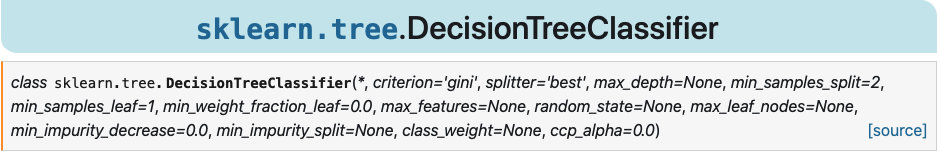


Source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

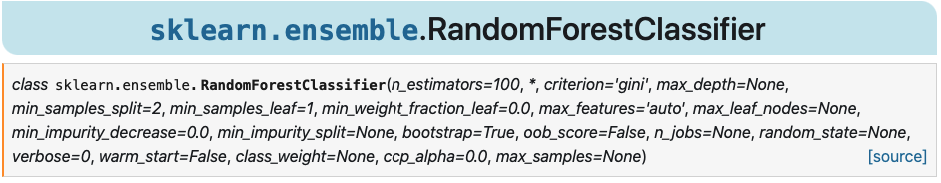

Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Vamos a usar scikit-learn para construir nuestro Random Forest, así que usamos la clase RandomForestClassifier de scikit-learn y creamos un objeto a partir de esa clase. Aquí es cuando definiremos lo que llamamos hiperparámetros del modelo. Estos son parámetros como la cantidad de árboles en el bosque que deben definirse antes de aprender.

Algunos hiperparámetros que podemos modificar son:

* n_estimators: este es el número de árboles en el bosque
* criterion: este es el criterio utilizado para construir árboles y separar ramas de árboles.
* max_depth: esta es la profundidad máxima de los árboles utilizados (el número de niveles en el árbol de decisión)
* min_sample_split: este es el número mínimo de muestras en una hoja para rehacer una separación
* min_samples_leaf: este es el número mínimo de muestras para crear una hoja
* min_weight_fraction_leaf: esta es la fracción del número total de muestras mínimas para crear una hoja
* max_features: este es el número de columnas seleccionadas para cada árbol (por defecto tomamos la raíz cuadrada del número de columnas)
* max_leaf_nodes: este es el número máximo de hojas
* min_impurity_decrease: esta es la disminución mínima en el criterio de impureza para hacer una separación
* bootstrap: parámetro para usar bootstrap, si es False, se toma la misma muestra para cada árbol
* n_jobs; número de tratamientos a realizar en paralelo
* random_state: semilla aleatoria
* warm_start: esto le permite partir del resultado del último aprendizaje para hacer el aprendizaje
* class_weights: estos son los pesos asociados con cada clase si tiene sentido
* max_samples: si desea reducir el número de observaciones en sus muestras de arranque

In [ ]:
modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

Una vez definido los hiperparámetros y construido nuestro objeto Random Forest, procedemos a realizar el aprendizaje.

In [ ]:
modele_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### **Atención:**

Algo interesante de Random Forest, en comparación con las redes neuronales, es que no es una caja negra y podemos revisar la importancia de las variables en nuestro modelo.

In [ ]:
pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
total sulfur dioxide,0.308508
chlorides,0.273342
volatile acidity,0.094742
density,0.073605
sulphates,0.062247
free sulfur dioxide,0.058238
residual sugar,0.050653
fixed acidity,0.036445
pH,0.020247
citric acid,0.010920


## **Validación del Modelo**

Ahora que nuestro modelo ha entrenado debe ser validado. Para ello, utilizaremos datos de prueba definidos en la etapa de training/test.

Compararemos el valor predicho por el modelo con el valor de los datos. El punto aquí es comparar el color del vino predicho por el modelo y el observado en nuestra muestra de prueba.

El primer indicador utilizado es el porcentaje de bien clasificados también llamado precisión:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"El accuracy de nuestro modelo es de : {accuracy_score(y_test, modele_rf.predict(x_test))*100} %")

El accuracy de nuestro modelo es de : 99.63076923076923 %


Vemos que aquí tenemos un 99,63% de vinos bien clasificados, lo que refleja el potencial categórico de nuestro modelo.

Para tener un análisis más detallado de los resultados, podemos utilizar la matriz de confusión. Esto brinda más detalles sobre los vinos que están mal clasificados:

In [ ]:
pd.DataFrame(confusion_matrix(y_test, modele_rf.predict(x_test)),
             index = ["datos_vblanco", "datos_vtinto"],
             columns = ["pred_vblanco", "pred_vtinto"])

,pred_vblanco,pred_vtinto
datos_vblanco,1239,0
datos_vtinto,6,380
